<a href="https://colab.research.google.com/github/poojadusane135/Airbnb-price-prediction/blob/main/Airbnb_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!unzip "/content/drive/MyDrive/archive.zip"

Archive:  /content/drive/MyDrive/archive.zip
replace calendar.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: calendar.csv            
  inflating: listings.csv            
  inflating: reviews.csv             


In [16]:
import pandas as pd
import numpy as np


In [17]:
listings = pd.read_csv("/content/listings.csv")
calendar = pd.read_csv("/content/calendar.csv")
reviews = pd.read_csv("/content/reviews.csv")

In [18]:
listings.shape, calendar.shape,reviews.shape

((426, 75), (155490, 7), (24752, 6))

In [19]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155490 entries, 0 to 155489
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   listing_id      155490 non-null  int64  
 1   date            155490 non-null  object 
 2   available       155490 non-null  object 
 3   price           155490 non-null  object 
 4   adjusted_price  0 non-null       float64
 5   minimum_nights  155490 non-null  int64  
 6   maximum_nights  155490 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 8.3+ MB


In [20]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            426 non-null    int64  
 1   listing_url                                   426 non-null    object 
 2   scrape_id                                     426 non-null    int64  
 3   last_scraped                                  426 non-null    object 
 4   source                                        426 non-null    object 
 5   name                                          426 non-null    object 
 6   description                                   413 non-null    object 
 7   neighborhood_overview                         228 non-null    object 
 8   picture_url                                   426 non-null    object 
 9   host_id                                       426 non-null    int

In [21]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24752 entries, 0 to 24751
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     24752 non-null  int64 
 1   id             24752 non-null  int64 
 2   date           24752 non-null  object
 3   reviewer_id    24752 non-null  int64 
 4   reviewer_name  24752 non-null  object
 5   comments       24745 non-null  object
dtypes: int64(3), object(3)
memory usage: 1.1+ MB


In [22]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2992450,2024-09-05,f,$70.00,NaN,28,1125
1,2992450,2024-09-06,f,$70.00,NaN,28,1125
2,2992450,2024-09-07,f,$70.00,NaN,28,1125
3,2992450,2024-09-08,f,$70.00,NaN,28,1125
4,2992450,2024-09-09,f,$70.00,NaN,28,1125


Lable encoding on available column

In [23]:
calendar['available'] = calendar['available'].map({'t': 1, 'f': 0})

In [24]:
calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2992450,2024-09-05,0,$70.00,NaN,28,1125
1,2992450,2024-09-06,0,$70.00,NaN,28,1125
2,2992450,2024-09-07,0,$70.00,NaN,28,1125
3,2992450,2024-09-08,0,$70.00,NaN,28,1125
4,2992450,2024-09-09,0,$70.00,NaN,28,1125


In [25]:
calendar.isnull().sum()

,0
listing_id,0
date,0
available,0
price,0
adjusted_price,155490
minimum_nights,0
maximum_nights,0


Droping the adjusted_price column


In [26]:
calendar=calendar.drop("adjusted_price",axis=1)

In [27]:
calendar.isnull().sum()

,0
listing_id,0
date,0
available,0
price,0
minimum_nights,0
maximum_nights,0


In [28]:
calendar['price'] = calendar['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)


In [29]:
calendar.head()

,listing_id,date,available,price,minimum_nights,maximum_nights
0,2992450,2024-09-05,0,70.0,28,1125
1,2992450,2024-09-06,0,70.0,28,1125
2,2992450,2024-09-07,0,70.0,28,1125
3,2992450,2024-09-08,0,70.0,28,1125
4,2992450,2024-09-09,0,70.0,28,1125


Grouping (listing_id) to calculate average price and availability rate

In [30]:
calendar_summary = calendar.groupby('listing_id').agg(
    avg_price=('price', 'mean'),
    availability_rate=('available', 'mean')
).reset_index()

In [31]:
calendar_summary.head()

,listing_id,avg_price,availability_rate
0,2992450,70.0,0.432877
1,3820211,125.0,0.920548
2,5651579,75.0,0.093151
3,6623339,125.0,0.764384
4,8035768,299.0,0.991781


In [32]:
calendar_summary.shape

(426, 3)

In [33]:
listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2992450,https://www.airbnb.com/rooms/2992450,20240905032005,2024-09-05,city scrape,Luxury 2 bedroom apartment,The apartment is located in a quiet neighborho...,NaN,https://a0.muscache.com/pictures/44627226/0e72...,4621559,...,4.56,3.22,3.67,NaN,f,1,1,0,0,0.07
1,3820211,https://www.airbnb.com/rooms/3820211,20240905032005,2024-09-05,city scrape,Restored Precinct in Center Sq. w/Parking,"Cozy, cool little 1BR Apt in the heart Albany'...","Great restaurants, architecture, walking, peop...",https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.81,4.82,4.78,NaN,f,4,4,0,0,2.49
2,5651579,https://www.airbnb.com/rooms/5651579,20240905032005,2024-09-05,city scrape,Large studio apt by Capital Center & ESP@,"Spacious studio with hardwood floors, fully eq...",The neighborhood is very eclectic. We have a v...,https://a0.muscache.com/pictures/b3fc42f3-6e5e...,29288920,...,4.87,4.76,4.63,NaN,f,2,1,1,0,3.22
3,6623339,https://www.airbnb.com/rooms/6623339,20240905032005,2024-09-05,city scrape,Center Sq. Loft in Converted Precinct w/ Parking,Large renovated 1 bedroom apartment in convert...,"Located in Albany's finest urban neighborhood,...",https://a0.muscache.com/pictures/prohost-api/H...,19648678,...,4.70,4.80,4.72,NaN,f,4,4,0,0,2.91
4,8035768,https://www.airbnb.com/rooms/8035768,20240905032005,2024-09-05,city scrape,Entire Beautiful French Victorian 1884,Stunningly renovated French Victorian original...,There is a Barbershop with 1900' barber chairs...,https://a0.muscache.com/pictures/103429331/a0a...,42430824,...,4.80,4.74,4.75,NaN,f,2,1,1,0,0.51


In [34]:
listings_data = listings[['id', 'price', 'review_scores_communication',
                          'review_scores_location', 'review_scores_value',
                          'calculated_host_listings_count', 'instant_bookable',
                          'reviews_per_month']]


In [35]:
merged_data = calendar_summary.merge(listings_data, left_on='listing_id', right_on='id', how='left')

In [36]:
merged_data.drop(columns=['id'], inplace=True)

In [37]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   listing_id                      426 non-null    int64  
 1   avg_price                       426 non-null    float64
 2   availability_rate               426 non-null    float64
 3   price                           400 non-null    object 
 4   review_scores_communication     366 non-null    float64
 5   review_scores_location          366 non-null    float64
 6   review_scores_value             366 non-null    float64
 7   calculated_host_listings_count  426 non-null    int64  
 8   instant_bookable                426 non-null    object 
 9   reviews_per_month               366 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 33.4+ KB


In [38]:
merged_data.isnull().sum()

,0
listing_id,0
avg_price,0
availability_rate,0
price,26
review_scores_communication,60
review_scores_location,60
review_scores_value,60
calculated_host_listings_count,0
instant_bookable,0
reviews_per_month,60


In [39]:
merged_data['price'].fillna(merged_data['avg_price'], inplace=True)

<ipython-input-39-c84bc6014d2c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['price'].fillna(merged_data['avg_price'], inplace=True)


In [40]:
merged_data.isna().sum()

,0
listing_id,0
avg_price,0
availability_rate,0
price,0
review_scores_communication,60
review_scores_location,60
review_scores_value,60
calculated_host_listings_count,0
instant_bookable,0
reviews_per_month,60


In [41]:
merged_data['instant_bookable'] = merged_data['instant_bookable'].map({'t': 1, 'f': 0})

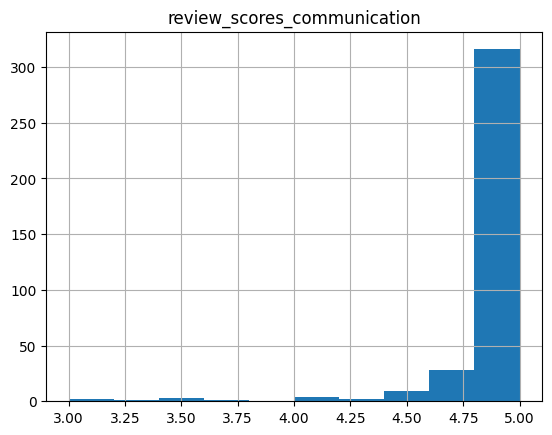

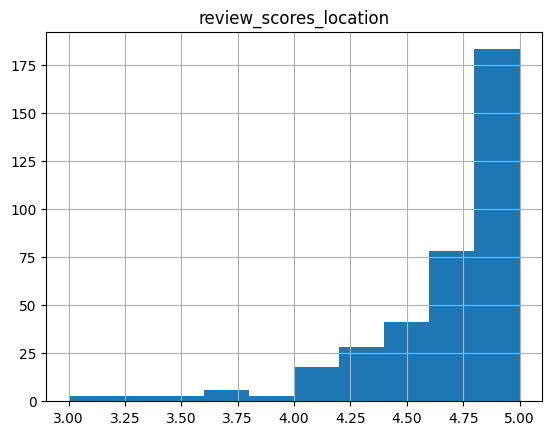

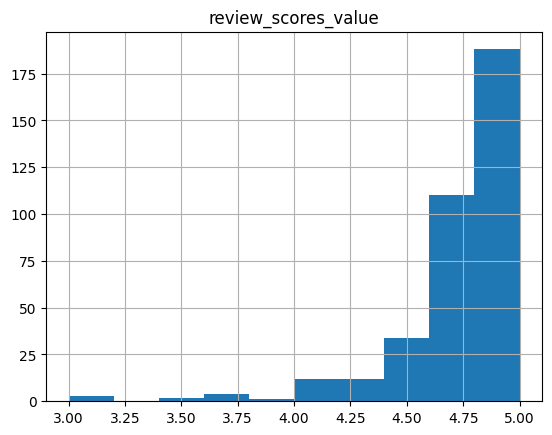

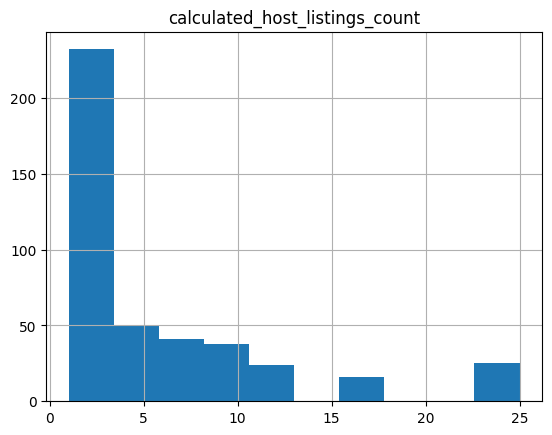

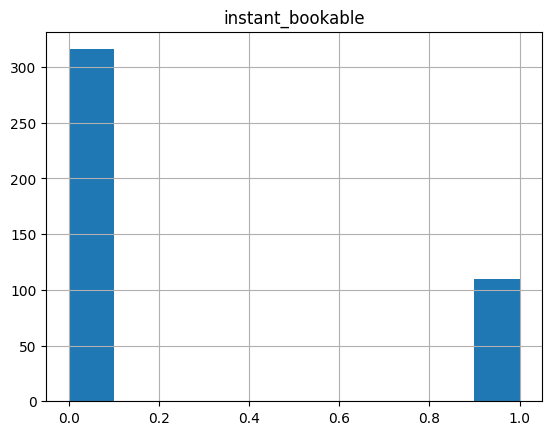

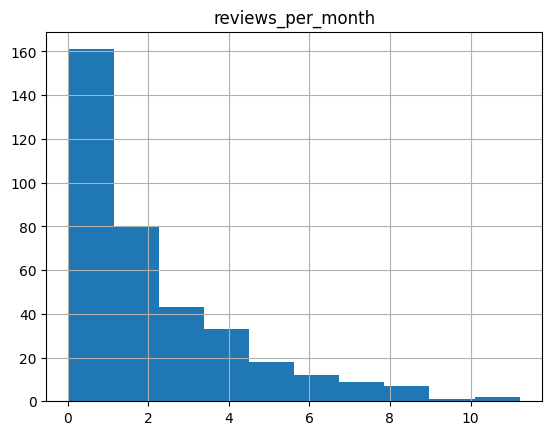

In [42]:
import matplotlib.pyplot as plt
for col in merged_data.columns[4:]:
  merged_data[[col]].hist()
  plt.show()

In [43]:
merged_data['review_scores_communication'].fillna(merged_data['review_scores_communication'].median(), inplace=True)
merged_data['review_scores_location'].fillna(merged_data['review_scores_location'].median(), inplace=True)
merged_data['review_scores_value'].fillna(merged_data['review_scores_value'].median(), inplace=True)
merged_data['reviews_per_month'].fillna(0, inplace=True)



<ipython-input-43-41ccb66ef2ef>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['review_scores_communication'].fillna(merged_data['review_scores_communication'].median(), inplace=True)
<ipython-input-43-41ccb66ef2ef>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

In [44]:
merged_data['price'] = merged_data['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [45]:
merged_data.isna().sum()

,0
listing_id,0
avg_price,0
availability_rate,0
price,0
review_scores_communication,0
review_scores_location,0
review_scores_value,0
calculated_host_listings_count,0
instant_bookable,0
reviews_per_month,0


In [46]:
merged_data.head()

,listing_id,avg_price,availability_rate,price,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,instant_bookable,reviews_per_month
0,2992450,70.0,0.432877,70.0,4.56,3.22,3.67,1,0,0.07
1,3820211,125.0,0.920548,116.0,4.81,4.82,4.78,4,0,2.49
2,5651579,75.0,0.093151,75.0,4.87,4.76,4.63,2,0,3.22
3,6623339,125.0,0.764384,116.0,4.70,4.80,4.72,4,0,2.91
4,8035768,299.0,0.991781,305.0,4.80,4.74,4.75,2,0,0.51


In [47]:
merged_data.skew()

,0
listing_id,-0.310628
avg_price,10.999546
availability_rate,-0.368341
price,7.514959
review_scores_communication,-4.895289
review_scores_location,-2.167319
review_scores_value,-2.872288
calculated_host_listings_count,1.840781
instant_bookable,1.108819
reviews_per_month,1.589242


In [48]:
skew_col=['avg_price',
    'price',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value',
    'reviews_per_month']

In [49]:
for col in skew_col:
  if (merged_data[col]<=0).any():
    print(merged_data[col])

0      0.07
1      2.49
2      3.22
3      2.91
4      0.51
       ... 
421    0.00
422    0.00
423    0.00
424    0.00
425    0.00
Name: reviews_per_month, Length: 426, dtype: float64


In [50]:
merged_data['reviews_per_month']+=1

In [51]:
from sklearn.preprocessing import power_transform
merged_data.loc[:, skew_col] = power_transform(merged_data.loc[:, skew_col],
                            method = "box-cox")


In [52]:
merged_data.skew()

,0
listing_id,-0.310628
avg_price,-0.095244
availability_rate,-0.368341
price,-0.062674
review_scores_communication,-0.808165
review_scores_location,-0.382612
review_scores_value,-0.271785
calculated_host_listings_count,1.840781
instant_bookable,1.108819
reviews_per_month,0.103586


**Using textBlob to calculate review score it uses polarity**







In [53]:
from textblob import TextBlob
import pandas as pd

def get_sentiment(text):
    if pd.isna(text):
        return 0
    return TextBlob(text).sentiment.polarity


Feature Engineering (sentiment_score)

In [54]:
reviews['sentiment_score'] = reviews['comments'].apply(get_sentiment)


In [55]:
sentiment_df = reviews.groupby('listing_id')['sentiment_score'].mean().reset_index()

In [56]:
sentiment_df.head()

,listing_id,sentiment_score
0,2992450,0.260784
1,3820211,0.417884
2,5651579,0.390676
3,6623339,0.444014
4,8035768,0.436597


In [57]:
merged_data = merged_data.merge(sentiment_df, left_on='listing_id', right_on='listing_id', how='left')

In [58]:
merged_data.isna().sum()

,0
listing_id,0
avg_price,0
availability_rate,0
price,0
review_scores_communication,0
review_scores_location,0
review_scores_value,0
calculated_host_listings_count,0
instant_bookable,0
reviews_per_month,0


In [59]:
merged_data['sentiment_score'].fillna(0, inplace=True)

<ipython-input-59-86a4d4ccf364>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_data['sentiment_score'].fillna(0, inplace=True)


In [60]:
merged_data.isna().sum()

,0
listing_id,0
avg_price,0
availability_rate,0
price,0
review_scores_communication,0
review_scores_location,0
review_scores_value,0
calculated_host_listings_count,0
instant_bookable,0
reviews_per_month,0
